In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random


import plotly.graph_objs as go
from scipy.ndimage.filters import gaussian_filter1d

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


%matplotlib inline
init_notebook_mode(connected=True)  

In [282]:

def peak_delta(x):
    x = str(x)
    if x == 'low':
        result = -6
    elif x == 'high':
        result = 6
    else:
        result = 0
    return result



def lh_surge_length(x):
    result = int(np.ceil(x*.15))
    return result

def pg_surge_length(x):
    result = int(np.ceil(x*.5))
    return result

def estimated_day_ovulation(x):
    diff = x - 28
    result = 14 + diff
    return result

def lh_cycle_data(cycle_length, cycle_type = 'normal', pcos = False):
    if pcos == False:
        np.random.seed(1)
        eod = estimated_day_ovulation(cycle_length)
        peak = eod - 1
        surge_width = lh_surge_length(cycle_length)
        half_surge_length = int(np.ceil(surge_width/2))
        peak_height = peak_delta(cycle_type) + 20
        surge_slope =  peak_height/half_surge_length

        surge_profile = []

        for i in range(1, half_surge_length + 1):
            value = i*surge_slope
            surge_profile.append(value)

        surge_data = []
        surge_data.extend(surge_profile)

        second_half_profile = surge_profile[:]
        second_half_profile.sort(reverse = True)

        surge_data.extend(second_half_profile[1:])
        noise = np.random.normal(0, 1, len(surge_data))

        surge_data = surge_data + noise

        cycle_data = list(np.random.randint(0,2,int((cycle_length - surge_width)/2)))
        cycle_data.extend(surge_data)
        cycle_data.extend(list(np.random.randint(0,2,int((cycle_length - surge_width)/2))))
        
        cycle_data_clean = gaussian_filter1d(cycle_data, sigma=1)

    else:
        np.random.seed(1)
        eod = estimated_day_ovulation(cycle_length)
        peak = eod - 1
        surge_width = pg_surge_length(cycle_length)
        half_surge_length = int(np.ceil(surge_width/2))
        peak_height = peak_delta(cycle_type) + 14
        surge_slope =  peak_height/16

        surge_profile = []

        for i in range(13, half_surge_length + 14):
            value = i*surge_slope
            surge_profile.append(value)

        surge_data = []
        surge_data.extend(surge_profile)

        second_half_profile = surge_profile[:]
        second_half_profile.sort(reverse = True)

        surge_data.extend(second_half_profile[1:])
        noise = np.random.normal(0, .5, len(surge_data))

        surge_data = surge_data + noise

        cycle_data = list(np.random.randint(12,15,int((cycle_length - surge_width)/2)))
        cycle_data.extend(surge_data)
        cycle_data.extend(list(np.random.randint(12,15,int((cycle_length - surge_width)/2))))

        cycle_data_clean = gaussian_filter1d(cycle_data, sigma=1)
        
    return cycle_data_clean

def pg_cycle_data(cycle_length):
    np.random.seed(1)
    eod = estimated_day_ovulation(cycle_length)
    peak = eod + (cycle_length - eod)/2
    surge_width = pg_surge_length(cycle_length)
    half_surge_length = int(np.ceil(surge_width/2))
    peak_height = 12
    surge_slope =  peak_height/half_surge_length

    surge_profile = []

    for i in range(1, half_surge_length + 1):
        value = i*surge_slope
        surge_profile.append(value)

    surge_data = []
    surge_data.extend(surge_profile[:-(int(surge_width*.333))])
    surge_data.extend([peak_height]*int(.333*cycle_length))

    second_half_profile = surge_profile[:]
    second_half_profile.sort(reverse = True)

    surge_data.extend(second_half_profile[int(surge_width*.333):])
    noise = np.random.normal(0, 1, len(surge_data))

    surge_data = surge_data + noise

    cycle_data = list(np.random.randint(0,2,int((cycle_length/2.1
                                                ))))
    cycle_data.extend(surge_data)

    cycle_data_clean = gaussian_filter1d(cycle_data, sigma=1)
    return cycle_data_clean


In [293]:
lh_cycle = lh_cycle_data(28, cycle_type = 'normal', pcos = False)
lh_cycle_2 = lh_cycle_data(26, cycle_type = 'normal', pcos = False)

pg_cycle = pg_cycle_data(28)
pg_cycle_2 = pg_cycle_data(26)

x_lh  = np.array(range(len(lh_cycle)))
x_lh_2  = np.array(range(len(lh_cycle_2)))



x_pg  = np.array(range(len(pg_cycle)))
x_pg_2  = np.array(range(len(pg_cycle_2)))


trace1 = go.Scatter(
        x = x_lh,
        y = lh_cycle,
        name = 'Normal LH',
        opacity = 0.2,

    line = dict(
        width = 4,
        color = '#A52D04',
    )
    
)

trace2 = go.Scatter(
        x = x_pg,
        y = pg_cycle,
        name = 'Normal PG',
        opacity = 0.2,

    line = dict(
        width = 4,
        color = '#43024E'
    )
    
)

trace3 = go.Scatter(
        x = x_lh_2,
        y = lh_cycle_2,
        name = 'Short LH',
    line = dict(
        width = 4,
        color = '#A52D04'
    )
    
)

trace4 = go.Scatter(
        x = x_pg_2,
        y = pg_cycle_2,
        name = 'Short PG',
    line = dict(
        width = 4,
        color = '#43024E'
    )
    
)



layout = dict(
    paper_bgcolor='#FCF1DA',
  plot_bgcolor='#FCF1DA')


data = [trace1, trace3, trace2, trace4]
# data = [trace1]


fig = dict(data=data, layout=layout)

iplot(fig, filename='basic-scatter')






In [287]:
len(x2)

35

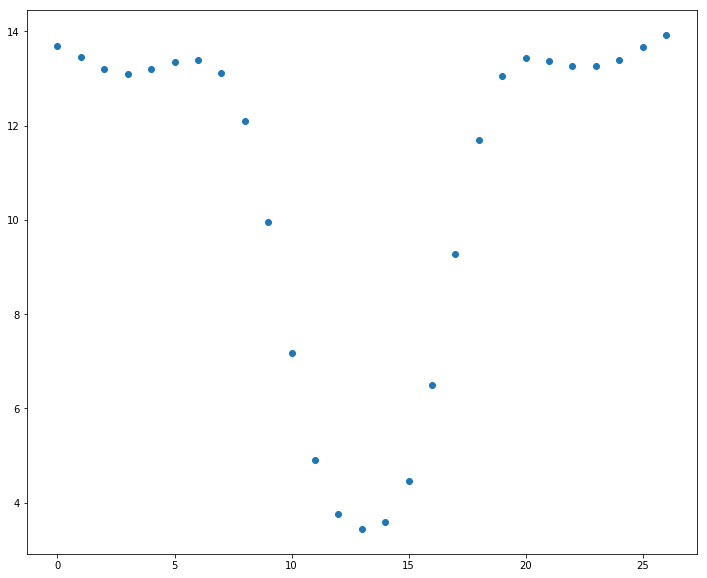

In [16]:

f = plt.figure(figsize = (12,10))
plt.scatter(x1, gaussian_filter1d(cycle_one, sigma=1.6)
)



plt.show()

In [ ]:
peak_delta('long')